# Exploring the best possible trade-off between competing objectives: identifying the Pareto Front

When considering optimisation of multiple objectives, the Pareto front is that collection of points where one objective cannot be improved without detriment to another objective*. These points are also called 'non-dominated'. In contrast, points not on the Pareto front, or 'dominated' points represents points where it is possible to improve one or more objectives without loss of performance of another objective. 

*An example of this type of problem is the planning of emergency department (ED) services. Ideally we all like to be close to an ED, but we also want that ED to be large enough to sustained 24/7 consultant physician presence. So we might for example have two objectives: the proportion of patients living with 30 minutes of an ED, and the proportion of patients who attend an ED with 24/7 consultant presence. The more EDs we have in England the more patients will be within 30 minutes of one, but as we plan for more EDs those EDs get smaller and fewer will be able to sustain 24/7 consultant presence. We may be interested in seeing the nature of the trade-off. We therefore explore lots of potential solutions (i.e. change the number and location of ED departments) and we identify the Pareto frontier.

Here we present code to identify points on the Pareto front. We will use an example with just two objectives (as that is easy to visualise) but the Pareto front principle works for any number of simultaneous objectives.

First we'll import our required libraries and then set up some dummy data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Some dummy data: Each item has two scores

scores = np.array([[97, 23],
                  [55, 77],
                  [34, 76],
                  [80, 60],
                  [99,  4],
                  [81,  5],
                  [ 5, 81],
                  [30, 79],
                  [15, 80],
                  [70, 65],
                  [90, 40],
                  [40, 30],
                  [30, 40],
                  [20, 60],
                  [60, 50],
                  [20, 20],
                  [30,  1],
                  [60, 40],
                  [70, 25],
                  [44, 62],
                  [55, 55],
                  [55, 10],
                  [15, 45],
                  [83, 22],
                  [76, 46],
                  [56, 32],
                  [45, 55],
                  [10, 70],
                  [10, 30],
                  [79, 50]])

And now let's plot that data.

In [2]:
% matplotlib inline

x = scores[:, 0]
y = scores[:, 1]

plt.scatter(x, y)
plt.xlabel('Objective A')
plt.ylabel('Objective B')
plt.show()

UsageError: Line magic function `%` not found.


Now we will define our function to identify those points that are on the Pareto front. We start off by assuming all points are on the Pareto front and then change the status of those that are not on the Pareto front. We use two loops. The outer loop ('i') will loop through all points in order to compare them to all other points (the comparison is made using the inner loop, 'j'). For any given point 'i', if any other point is at least as good in all objectives and is better in one, that point 'i' is known as 'dominated' and is not on the Pareto front. As soon as a better point is found another (point is at least as good in all objectives and is better in one), point i is marked as not on the Pareto front and the inner loop can stop.

The function returns the index numbers of points in the original array that are on the Pareto front.

In [18]:
def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

We'll now apply the function and print out our Pareto front index numbers and scores.

In [21]:
pareto = identify_pareto(scores)
print ('Pareto front index vales')
print ('Points on Pareto front: \n',pareto)

pareto_front = scores[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index vales
Points on Pareto front: 
 [ 0  1  3  4  6  7  8  9 10]

Pareto front scores
[[97 23]
 [55 77]
 [80 60]
 [99  4]
 [ 5 81]
 [30 79]
 [15 80]
 [70 65]
 [90 40]]


To aid plotting, we'll sort our Pareto front scores in ascending oder of first item. We'll use a Pandas DataFrame to make sorting easy.

In [7]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df.sort_values(0, inplace=True)
pareto_front = pareto_front_df.values

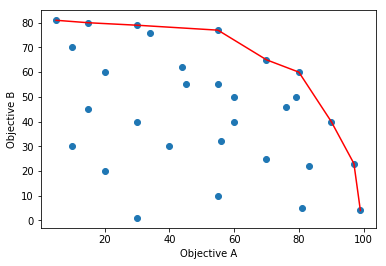

In [8]:
x_all = scores[:, 0]
y_all = scores[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

plt.scatter(x_all, y_all)
plt.plot(x_pareto, y_pareto, color='r')
plt.xlabel('Objective A')
plt.ylabel('Objective B')
plt.show()